In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import sparse,  io, linalg
import pickle
from tqdm import tqdm_notebook as tqdm
import networkx as nx
import snap
from utils import *
import utils
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
college_messages = np.loadtxt('collegemsg/CollegeMsg.txt',dtype=int)
# get time-interval indices:
indices = []
num_intervals = 4
t_max = college_messages.shape[0]
epoch_num = 1
epoch_ind_begin = int((epoch_num - 1)*t_max/num_intervals)
epoch_ind_end = int((epoch_num)*t_max/num_intervals)

In [19]:

# converting edge weight information into graph
G = nx.Graph()
for i in tqdm(range(epoch_ind_begin,epoch_ind_end)):
    if G.has_edge(college_messages[i,0],college_messages[i,1]):
        G[college_messages[i,0]][college_messages[i,1]]['weight']+=1
    else:
        G.add_edge(college_messages[i,0],college_messages[i,1],weight=1)
for e in tqdm(G.edges()):
    G[e[0]][e[1]]['weight_inv']=1/float(G[e[0]][e[1]]['weight'])
    G[e[0]][e[1]]['weight_inv_exp']=np.exp(-float(G[e[0]][e[1]]['weight'])/3.0)


<IPython.core.display.Javascript object>


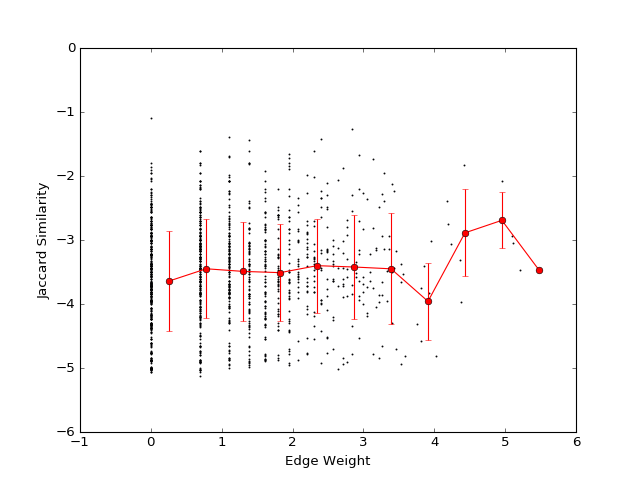

In [20]:
pwl=sim_score_1(G)

plot_log_log_summary(pwl,"Edge Weight", "Jaccard Similarity", B=10,summary=np.mean)


<IPython.core.display.Javascript object>


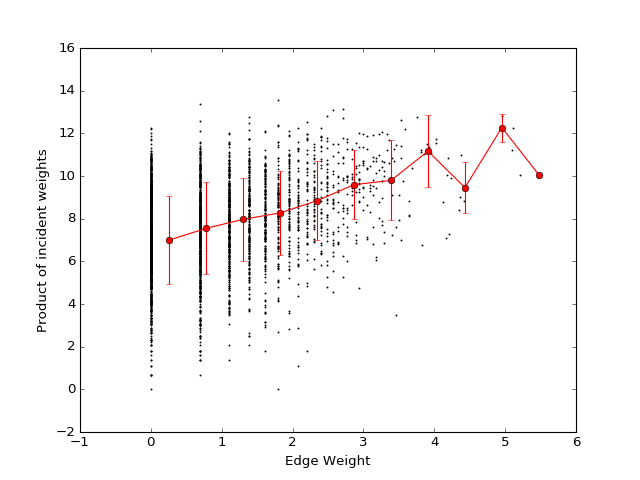

In [21]:
pwl=ewpl(G)
plot_log_log_summary(pwl,"Edge Weight", "Product of incident weights", summary=np.median,B=10)


<IPython.core.display.Javascript object>


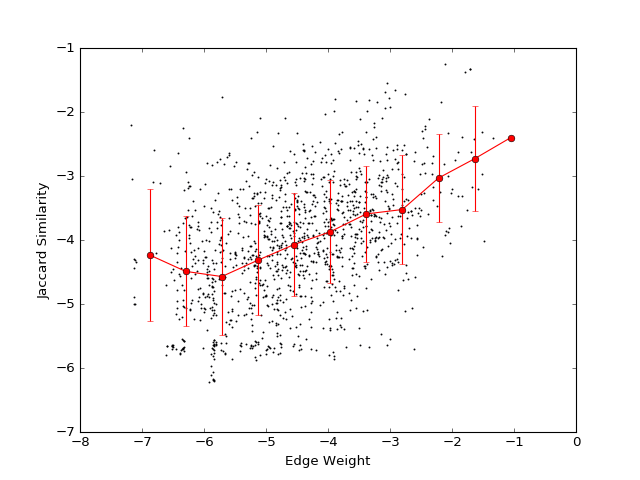

In [22]:
pwl=sim_score_2(G)
plot_log_log_summary(pwl,"Edge Weight", "Jaccard Similarity", B=10,summary=np.mean)


<IPython.core.display.Javascript object>


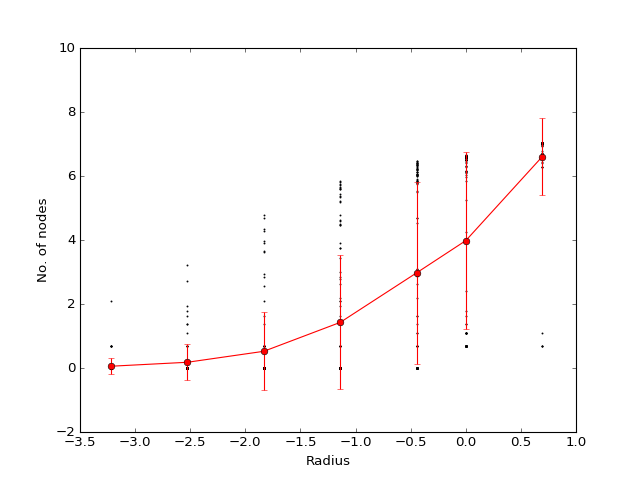

In [23]:
distances=[0.04,0.08,0.16,0.32,0.64,1.0,2.0]
pwl = self_similarity(G,distances,size=100)
plot_log_log_summary(np.asarray(pwl),"Radius", "No. of nodes",discrete=True,summary=np.mean)
